In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## 第一段階suumo用

In [2]:
s_train = pd.read_csv("train_add.csv")

In [3]:
train1 = s_train[["家賃","住所", "間取り", "方角", "築年数","構造", "面積", "アクセス"]]
train1.head()

,家賃,住所,間取り,方角,築年数,構造,面積,アクセス
0,27.2万円,東京都千代田区四番町,2LDK,西,築23年,マンション,64.74m2,"['ＪＲ総武線/市ヶ谷駅', '歩3分', '東京メトロ有楽町線/麹町駅', '歩7分', ..."
1,27.3万円,東京都千代田区四番町,2LDK,西,築23年,マンション,64.74m2,"['ＪＲ総武線/市ヶ谷駅', '歩3分', '東京メトロ有楽町線/麹町駅', '歩7分', ..."
2,16.5万円,東京都千代田区岩本町２,1LDK,北,築14年,マンション,42.16m2,"['都営新宿線/岩本町駅', '歩3分', '東京メトロ日比谷線/秋葉原駅', '歩4分',..."
3,22.5万円,東京都千代田区神田西福田町,1LDK,北,築2年,マンション,44.83m2,"['ＪＲ総武線快速/新日本橋駅', '歩4分', 'ＪＲ山手線/神田駅', '歩5分', '..."
4,18万円,東京都千代田区神田神保町１,1LDK,北東,築3年,マンション,37.97m2,"['都営三田線/神保町駅', '歩3分', 'ＪＲ中央線/水道橋駅', '歩8分', '東京..."


In [4]:
a = train1["面積"][0]
float(a[:a.find("m2")])

64.74

In [5]:
#家賃
def yatin_re(x):
    return float(x[0:x.find("万円")])*10000

#築年数
def tikunen_re(x):
    if "年" in x:
        return float(x[1:x.find("年")])
    else:
        "NaN"

#間取り
room_number = []
L = []
S = []
D = []
K = []
def re_madori(x):
    if x == "ワンルーム":
        room_number.append(1)
    else:
        
        if x[1].isdecimal() == True:
            room_number.append(int(x[:2]))
            
        else:
            room_number.append(int(x[0]))
    
    if "L" in x:
        L.append(1)
    else:
        L.append(0)
    
    if "S" in x:
        S.append(1)
    else:
        S.append(0)
    
    if "D" in x:
        D.append(1)
    else:
        D.append(0)
    
    if "K" in x:
        K.append(1)
    else:
        K.append(0)

#東京23区
Tokyo_23_1 = ["千代田", "中央", "港", "新宿", "文京", "渋谷", "台東", "墨田", "江東", "荒川", "足立", "葛飾", "江戸川",
            "品川", "目黒", "大田", "世田谷", "中野", "杉並", "練馬", "豊島", "北", "板橋"]

def area_23_2(x):
    for i in Tokyo_23_1:
        if i in str(x):
            return i
#面積
def menseki(x):
    return float(x[:x.find("m2")])

In [6]:
train1["賃料"] = train1["家賃"].apply(lambda x:yatin_re(x))
train1["築年数"] = train1["築年数"].apply(lambda x :tikunen_re(x))
train1["間取り"].apply(lambda x : re_madori(x))
train1["部屋数"] = room_number
train1["L"] = L
train1["S"] = S
train1["D"] = D
train1["K"] = K
train1["23区"] = train1["住所"].apply(lambda x : area_23_2(x))
train1["面積"] = train1["面積"].apply(lambda x :menseki(x))
train1["賃料対数"] = train1["賃料"].apply(lambda x : math.log10(x))

C:\Users\Yuta_yamazaki\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yuta_yamazaki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Yuta_yamazaki\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [7]:
use_suumo = train1[["方角", "築年数", "構造", "面積", "部屋数", "L", "S", "D", "K", "23区", "賃料", "賃料対数"]]
use_suumo["t"] = 0

C:\Users\Yuta_yamazaki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 第一段階　train test

In [8]:
train2_read = pd.read_csv("train_geo.csv")
test_read = pd.read_csv("test_geo.csv")

train2 = train2_read[["所在地", "間取り", "方角", "築年数", "建物構造", "所在階","面積", "賃料"]]
test = test_read[[ "所在地", "間取り", "方角", "築年数", "建物構造", "所在階", "面積"]]

train2["t"] = 0
test["t"] = 1
a = pd.concat([train2, test])
a = a.reset_index(drop=True)

C:\Users\Yuta_yamazaki\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Yuta_yamazaki\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Yuta_yamazaki\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'

In [9]:
def tikunennsuu_re(x):
    if "年" in str(x):
        return int(x[:x.find("年")])
    else:
        if "月" in str(x):
            return 0
        else:
            return 0
        
def nannkai(x):
    if "／" in str(x) :
        we = x.split("／")
        if we[1][1].isdecimal() == True:
            return int(we[1][:2])
        else:
            return int(we[1][0])
    else:
        return "NaN"

In [10]:
room_number = []
L = []
S = []
D = []
K = []
a["面積"] = a["面積"].apply(lambda x : menseki(x))
a["間取り"].apply(lambda x : re_madori(x))    
a["部屋数"] = room_number
a["L"] = L
a["S"] = S
a["D"] = D
a["K"] = K
a["築年数"] = a["築年数"].apply(lambda x : tikunennsuu_re(x))
a["何階建て"] = a["所在階"].apply(lambda x : nannkai(x))

structure = []

for t in range(len(a)):
    if a.iloc[t,4] == "木造" or a.iloc[t,4] == "軽量鉄骨 ":
        if a.iloc[t,14] == "NaN":
            structure.append("アパート")
        else:
            if int(a.iloc[t,14]) < 4:
                structure.append("アパート")
            else:
                structure.append("マンション")
    else:
        structure.append("マンション")
a["構造"] = structure 

a["23区"] = a["所在地"].apply(lambda x : area_23_2(x))
a["賃料対数"] = a["賃料"].apply(lambda x : math.log10(x))

In [11]:
a

,t,建物構造,所在地,所在階,方角,築年数,賃料,間取り,面積,部屋数,L,S,D,K,何階建て,構造,23区,賃料対数
0,0,RC（鉄筋コンクリート）,東京都北区滝野川３丁目,1階／12階建,南東,9,75000.0,1K,20.01,1,0,0,0,1,12,マンション,北,4.875061
1,0,鉄骨造,東京都中央区月島３丁目,5階／10階建,NaN,44,76000.0,1R,16.50,1,0,0,0,0,10,マンション,中央,4.880814
2,0,RC（鉄筋コンクリート）,東京都渋谷区笹塚２丁目,12階／15階建,南,8,110000.0,1K,22.05,1,0,0,0,1,15,マンション,渋谷,5.041393
3,0,RC（鉄筋コンクリート）,東京都杉並区高円寺南２丁目23-2,3階／4階建,南,29,150000.0,2LDK,60.48,2,1,0,1,1,4,マンション,杉並,5.176091
4,0,木造,東京都葛飾区金町３丁目7-2,1階／2階建,南,31,74000.0,2DK,39.66,2,0,0,1,1,2,マンション,葛飾,4.869232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62727,1,RC（鉄筋コンクリート）,東京都豊島区上池袋４丁目,6階／8階建,東,0,NaN,1K,25.66,1,0,0,0,1,8,マンション,豊島,NaN
62728,1,RC（鉄筋コンクリート）,東京都千代田区岩本町２丁目,8階／15階建,南,15,NaN,1R,22.71,1,0,0,0,0,15,マンション,千代田,NaN
62729,1,RC（鉄筋コンクリート）,東京都中野区江古田３丁目14-3,10階／14階建,南東,1,NaN,1LDK,45.76,1,1,0,1,1,14,マンション,中野,NaN
62730,1,SRC（鉄骨鉄筋コンクリート）,東京都千代田区二番町,14階／14階建,北,15,NaN,1K,55.20,1,0,0,0,1,14,マンション,千代田,NaN


In [12]:
use_data = a[["方角", "築年数", "構造", "面積", "部屋数", "L", "S", "D", "K", "23区", "賃料", "賃料対数", "t"]]

# 第二段階
- 賃料に対数をとったものを予測する

In [53]:
all_data = pd.concat([use_suumo, use_data], sort=False)
all_data = all_data.reset_index(drop=True)

In [54]:
all_data.dtypes

方角       object
築年数     float64
構造       object
面積      float64
部屋数       int64
L         int64
S         int64
D         int64
K         int64
23区      object
賃料      float64
賃料対数    float64
t         int64
dtype: object

In [55]:
all_data

,方角,築年数,構造,面積,部屋数,L,S,D,K,23区,賃料,賃料対数,t
0,西,23.0,マンション,64.74,2,1,0,1,1,千代田,272000.0,5.434569,0
1,西,23.0,マンション,64.74,2,1,0,1,1,千代田,273000.0,5.436163,0
2,北,14.0,マンション,42.16,1,1,0,1,1,千代田,165000.0,5.217484,0
3,北,2.0,マンション,44.83,1,1,0,1,1,千代田,225000.0,5.352183,0
4,北東,3.0,マンション,37.97,1,1,0,1,1,千代田,180000.0,5.255273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757427,東,0.0,マンション,25.66,1,0,0,0,1,豊島,NaN,NaN,1
757428,南,15.0,マンション,22.71,1,0,0,0,0,千代田,NaN,NaN,1
757429,南東,1.0,マンション,45.76,1,1,0,1,1,中野,NaN,NaN,1
757430,北,15.0,マンション,55.20,1,0,0,0,1,千代田,NaN,NaN,1


In [56]:
all_data_1 = pd.get_dummies(all_data)


In [57]:
all_data_1["賃料対数"]

0         5.434569
1         5.436163
2         5.217484
3         5.352183
4         5.255273
            ...   
757427         NaN
757428         NaN
757429         NaN
757430         NaN
757431         NaN
Name: 賃料対数, Length: 757432, dtype: float64

In [58]:
train = all_data_1[all_data["t"] == 0]
test = all_data_1[all_data["t"] == 1]

train["賃料対数"] = train["賃料対数"].apply(lambda x : round(x, 2))
train = train.dropna(how="any")

train_useX = train.drop(["t","賃料","賃料対数"], axis=1)

train_useY = train["賃料対数"]*100
test_useX = test.drop(["t","賃料", "賃料対数"], axis=1)

C:\Users\Yuta_yamazaki\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [59]:
train_useY = train_useY.apply(lambda x : int(x))

In [60]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(train_useX, train_useY,random_state=42)


In [61]:
train_y

451968    504
710339    501
417954    541
511997    496
67980     511
         ... 
719329    491
299001    490
413013    523
155806    599
144407    599
Name: 賃料対数, Length: 488256, dtype: int64

In [62]:
test_y

285587    491
503589    513
445134    519
605038    484
548651    486
         ... 
367096    539
287274    498
4967      500
602969    520
346602    499
Name: 賃料対数, Length: 162752, dtype: int64

In [63]:
from sklearn.ensemble import RandomForestClassifier as RF

In [24]:
model = RF()
model.fit(train_X, train_y)
print(model.score(test_X, test_y))

C:\Users\Yuta_yamazaki\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9370207432166732


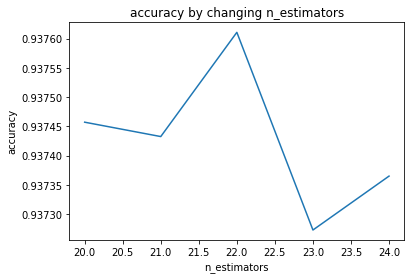

In [240]:
n_estimators_list  = [i for i in range(20,25)]

accuracy = []

for n_estimators in n_estimators_list:
    model = RF(n_estimators=n_estimators)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

plt.plot(n_estimators_list, accuracy)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.title("accuracy by changing n_estimators")
plt.show()

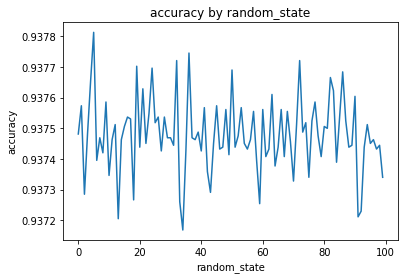

In [242]:
r_seed  = [i for i in range(100)]

accuracy = []

for r in r_seed:
    model = RF(n_estimators=22, random_state=r)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

plt.plot(r_seed, accuracy)
plt.xlabel("random_state")
plt.ylabel("accuracy")
plt.title("accuracy by random_state")
plt.show()

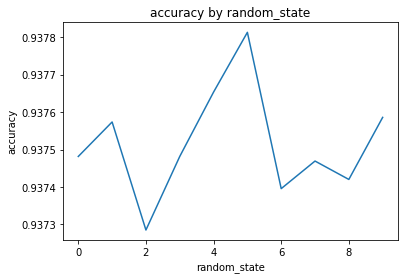

In [243]:
r_seed  = [i for i in range(10)]

accuracy = []

for r in r_seed:
    model = RF(n_estimators=22, random_state=r)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

plt.plot(r_seed, accuracy)
plt.xlabel("random_state")
plt.ylabel("accuracy")
plt.title("accuracy by random_state")
plt.show()

In [25]:
model = RF(n_estimators=22, random_state=5)
model.fit(train_X, train_y)
model.score(test_X, test_y)

0.9378133602044829

In [26]:
from sklearn.metrics import r2_score
result = model.predict(test_X)
r2_score(test_y, result)

0.9944045236971822

In [27]:
model.score(train_X, train_y)

0.9698232074977061

In [28]:
result_f = model.predict(test_useX)

In [64]:
a = train["賃料"]
b = model.predict(train_useX)
c = 10 ** b 

In [65]:
len(train), len(train_useX)

(651008, 651008)

In [74]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(a, c))

186159.94487219336

# 第三段階
- suumoにない情報を用いる。

In [29]:
a1 = pd.read_csv("train_geo.csv")
a1 = a1.drop(["id"], axis=1)
a2 = pd.read_csv("test_geo.csv")
a2 = a2.drop(["id"], axis=1)

In [30]:
#面積
def menseki(x):
    if "m2" in x:
        return float(x[:x.find("m2")])
    
#所在階
def floor_number1(x):
    if "／" in x:
        a = x.split("／")[0]
        if "地下" in a:
            return -int(a[a.find("地下")+2:a.find("階")])
        elif a == '':
            return 0
        else:
            return int(a[:a.find("階")])
    else:
        return 0

#何階建てか
def floor_number2(x):
    if "／" in x:
        a = x.split("／")[1]
        return int(a[:a.find("階建")])
    else:
        return 0


In [31]:
a1["tt"] = 0
a2["tt"] = 1
a1["賃料対数"] = a1["賃料"].apply(lambda x : math.log10(x))
a2["賃料対数"] = result_f * 10 **-2

a1["面積m2"] = a1["面積"].apply(lambda x : menseki(x))
a2["面積m2"] = a2["面積"].apply(lambda x : menseki(x))

a1["部屋のある階"] = a1["所在階"].apply(lambda x : floor_number1(x))
a2["所在階"] = a2["所在階"].fillna("0")
a2["部屋のある階"] = a2["所在階"].apply(lambda x : floor_number1(x))

a1["何階建て"] = a1["所在階"].apply(lambda x : floor_number2(x))
a2["何階建て"] = a2["所在階"].apply(lambda x : floor_number2(x))

In [32]:
#アクセス
K = []
for s in range(len(a1)):
    K.append(a1["アクセス"][s].split("\t\t"))

#最寄り駅まで何分
A3 = []
A3_2 = []
for s in range(len(K)):
    A4=[]
    for i in range(len(K[s])):
        if "バス" in K[s][i]:
            A4.append(40)
        else:
            if "徒歩" in K[s][i]:
                if "\t" in K[s][i]:
                    l = K[s][i].split("\t")[2]
                    
                    A4.append(int(l[l.find("徒歩")+2:l.find("分")]))
                
    A3.append(min(A4))
    A3_2.append(max(A4))

a1["最寄り駅までの分数"] = A3
a1["最も遠い駅までの分数"] = A3_2

# 路線を調べる
A2 = []
for s in range(len(K)):
    A1=[]
    for i in range(len(K[s])):
        if "\t" in K[s][i]:
            
            l = K[s][i].split("\t")[0]
            if "\u3000" in l:
                A1.append(l.split("\u3000")[0])
            
            else:
                A1.append(K[s][i].split("\t")[0])
        else:
            if "・" in K[s][i]:
                b = K[s][i].split("・")[0]
                A1.append(b)
                
    A2.append(A1)

a1["路線"] = A2

line = []
for u in range(len(A2)):
    line.append(A2[u][0])
    
a1["最も近い路線"] = line

In [33]:
#アクセス
K = []
for s in range(len(a2)):
    K.append(a2["アクセス"][s].split("\t\t"))

#最寄り駅まで何分
A3 = []
A3_2 = []
for s in range(len(K)):
    A4=[]
    for i in range(len(K[s])):
        if "バス" in K[s][i]:
            A4.append(40)
        else:
            if "徒歩" in K[s][i]:
                if "\t" in K[s][i]:
                    l = K[s][i].split("\t")[2]
                    
                    A4.append(int(l[l.find("徒歩")+2:l.find("分")]))
                
    A3.append(min(A4))
    A3_2.append(max(A4))

a2["最寄り駅までの分数"] = A3
a2["最も遠い駅までの分数"] = A3_2

# 路線を調べる
A2 = []
for s in range(len(K)):
    A1=[]
    for i in range(len(K[s])):
        if "\t" in K[s][i]:
            
            l = K[s][i].split("\t")[0]
            if "\u3000" in l:
                A1.append(l.split("\u3000")[0])
            
            else:
                A1.append(K[s][i].split("\t")[0])
        else:
            if "・" in K[s][i]:
                b = K[s][i].split("・")[0]
                A1.append(b)
                
    A2.append(A1)

a2["路線"] = A2

line = []
for u in range(len(A2)):
    line.append(A2[u][0])
    
a2["最も近い路線"] = line

### 次のコードがうまく動かないためCONCAT

In [83]:
train = pd.concat([a1, a2], axis=0, sort=True)
train = train.reset_index(drop=True)

In [84]:
 # 新築なら0をそれ以外なら、年数を数値型で返す関数
def change_age(x):
    if x == '新築':
        return 0
    else:
         return int(x.split('年')[0])
train['築年数'] = train['築年数'].apply(lambda x : change_age(x))

In [85]:
import re
import collections

A = []
for i in range(len(train)):
    try:
        a = re.split('[／\t,\t]',train["室内設備"][i])
        
        for s in range(len(a)):
            A.append(a[s])
    except TypeError:
        A.append(0)
        
counter = collections.Counter(A)
print(dict(counter))        

{'エアコン付': 59257, 'シューズボックス': 45798, '': 441741, 'バルコニー': 49969, 'フローリング': 54353, '室内洗濯機置場': 54579, '敷地内ごみ置き場': 33275, 'エレベーター': 32146, '公営水道': 46183, '下水': 46701, '都市ガス': 50802, 'タイル張り': 27130, 'ウォークインクローゼット': 7547, '2面採光': 13132, '24時間換気システム': 21390, '3面採光': 2160, 'ペアガラス': 1252, '専用庭': 438, 0: 155, '水道その他': 3410, '冷房': 10474, 'クッションフロア': 773, '床暖房': 3209, 'プロパンガス': 1971, 'ロフト付き': 2458, '出窓': 2536, 'トランクルーム': 1028, '汲み取り': 11, 'オール電化': 1128, 'ルーフバルコニー': 658, '室外洗濯機置場': 3445, '床下収納': 1198, 'バリアフリー': 322, '浄化槽': 18, '防音室': 120, '二重サッシ': 178, '二世帯住宅': 4, 'ガスその他': 35, '洗濯機置場なし': 132, '排水その他': 14, '石油暖房': 2, '地下室': 10, 'ガス暖房': 13, '井戸': 3}


In [86]:
#設備
Air_con = []
syu = []
baruko = []
huro = []
sentakuokiba = []
sikitinaigomi = []
elevator = []
suidou = []
gesui = []
gas = []
tile = []
closet = []
two = []
ventilation_system = []
three = []
pairglass = []
garden = []
suidousonota = []
reibou = []
kussyon = []
yukadan = []
propane = []
loft = []
demado = []
trunk = []
kumitori = []
all_denka = []
roof_balcony = []
out_okiba = []
yukasita = []
barrier_free = []
zyousisou = []
bouon = []
nizyusassi = []
nisetai = []
gas_sonota = []
okiba_nasi = []
haisui_sonota = []
oil_dan = []
undergrand = []
gas_dan = []
ido = []
zero = []
 
columns_list = [Air_con, syu, baruko, huro, sentakuokiba, sikitinaigomi, elevator, suidou, gesui, gas, tile, closet,
                 two, ventilation_system, three, pairglass, garden, zero, suidousonota, reibou, kussyon, yukadan, propane,
                 loft, demado, trunk, kumitori, all_denka, roof_balcony, out_okiba, yukasita, barrier_free, zyousisou,
                 bouon, nizyusassi, nisetai, gas_sonota, okiba_nasi, haisui_sonota, oil_dan, undergrand, gas_dan, ido]
 
choose_language = ["エアコン付", "シューズボックス", "バルコニー", "フローリング", "室内洗濯置き場", "敷地内ごみ置き場",
                   "エレベーター", "公営水道", "下水", "都市ガス", "タイル張り", "ウォークインクローゼット", "2面採光",
                    "24時間換気システム", "3面採光", "ペアガラス", "専用庭", "0", "水道その他", "冷房", "クッションフロア",
                    "床暖房", "プロパンガス", "ロフト付き", "出窓", "トランクルーム", "汲み取り", "オール電化", "ルーフバルコニー",
                    "室外洗濯置き場", "床下収納", "バリアフリー", "浄化槽", "防音室", "二重サッシ", "二世帯住宅", "ガスその他",
                    "洗濯置き場なし", "排水その他", "石油暖房", "地下室", "ガス暖房", "井戸"]
 
def Facility_make_data(x):
    for i in range(len(columns_list)):
        if choose_language[i] in x:
            columns_list[i].append(1)
        else:
            columns_list[i].append(0)

            
def Facility_zero_data(x):
    for i in range(len(columns_list)):
        columns_list[i].append(0)
         

 
 

In [87]:
for k in range(len(train)):
    try:
        x = re.split('[／\t,\t]',train["室内設備"][k])
        Facility_make_data(x)
    except TypeError:
        Facility_zero_data(x)

output_data = pd.DataFrame({"エアコン付":Air_con, "シューズボックス":syu, "バルコニー":baruko, "フローリング":huro,
                      "室内洗濯置き場":sentakuokiba, "敷地内ごみ置き場":sikitinaigomi, "エレベーター":elevator, "公営水道":suidou, 
                      "下水":gesui, "都市ガス":gas, "タイル張り":tile, "ウォークインクローゼット":closet,
                      "2面採光":two, "24時間換気システム":ventilation_system, "3面採光":three, "ペアガラス":pairglass,
                      "専用庭":garden, "0":zero, "水道その他":suidousonota, "冷房":reibou,
                      "クッションフロア":kussyon, "床暖房":yukadan, "プロパンガス":propane, "ロフト付き":loft,
                      "出窓":demado, "トランクルーム":trunk, "汲み取り":kumitori, "オール電化":all_denka,
                      "ルーフバルコニー":roof_balcony, "室外洗濯置き場":out_okiba, "床下収納":yukasita, "バリアフリー":barrier_free,
                      "浄化槽":zyousisou, "防音室":bouon, "二重サッシ":nizyusassi, "二世帯住宅":nisetai,
                      "ガスその他":gas_sonota, "洗濯置き場なし":okiba_nasi, "排水その他":haisui_sonota, "石油暖房":oil_dan,
                      "地下室":undergrand, "ガス暖房":gas_dan, "井戸":ido})

output_data

,エアコン付,シューズボックス,バルコニー,フローリング,室内洗濯置き場,敷地内ごみ置き場,エレベーター,公営水道,下水,都市ガス,...,防音室,二重サッシ,二世帯住宅,ガスその他,洗濯置き場なし,排水その他,石油暖房,地下室,ガス暖房,井戸
0,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62727,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
62728,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
62729,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62730,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [88]:
train = pd.concat([train, output_data], axis=1)

In [89]:
#放送・通信　データクリーニング
train_net = train["放送・通信"].str.split("\t", expand=True)
 
net_calums =['インターネット対応', 'インターネット対応／', 'CATV', 'CATV／', 'CSアンテナ', 'CSアンテナ／', 'BSアンテナ', 'BSアンテナ／','光ファイバー', '光ファイバー／', '高速インターネット', '高速インターネット／', 'インターネット使用料無料', 'インターネット使用料無料／','有線放送', '有線放送／']
 
 # カルムの数
count=len(train_net.columns)
 
 # kitchen_calumsの追加
for _, colname in enumerate(net_calums):
    train_net[colname]=0
         
    for k in range(count):
        train_net.loc[train_net[k]==colname, colname]=1 
         
# 必要なカルムのみ        
train_net = train_net[net_calums].copy()
 
train_net['インターネット対応']=train_net['インターネット対応']+train_net['インターネット対応／']
train_net['CATV']=train_net['CATV']+train_net['CATV／']
train_net['CSアンテナ']=train_net['CSアンテナ']+train_net['CSアンテナ／']
train_net['BSアンテナ']=train_net['BSアンテナ']+train_net['BSアンテナ／']
train_net['光ファイバー']=train_net['光ファイバー']+train_net['光ファイバー／']
train_net['高速インターネット']=train_net['高速インターネット']+train_net['高速インターネット／']
train_net['インターネット使用料無料']=train_net['インターネット使用料無料']+train_net['インターネット使用料無料／']
train_net['有線放送']=train_net['有線放送']+train_net['有線放送／']
 
train_net = train_net.drop(['インターネット対応／', 'CATV／','CSアンテナ／', 'BSアンテナ／', '光ファイバー／', '高速インターネット／', 'インターネット使用料無料／','有線放送／'], axis=1)

In [90]:
train = pd.concat([train, train_net], axis=1)

In [91]:
#間取りのダミー化
room_number = []
L = []
S = []
D = []
K = []
def re_madori(x):
    if x == "ワンルーム":
        room_number.append(1)
    else:
        
        if x[1].isdecimal() == True:
            room_number.append(int(x[:2]))
            
        else:
            room_number.append(int(x[0]))
    
    if "L" in x:
        L.append(1)
    else:
        L.append(0)
    
    if "S" in x:
        S.append(1)
    else:
        S.append(0)
    
    if "D" in x:
        D.append(1)
    else:
        D.append(0)
    
    if "K" in x:
        K.append(1)
    else:
        K.append(0)

In [92]:
train["間取り"].apply(lambda x : re_madori(x))
train["部屋数"] = room_number
train["L"] = L
train["S"] = S
train["D"] = D
train["K"] = K

In [93]:
train.columns

Index(['precision', 'score', 'tt', 'x', 'y', 'アクセス', 'キッチン', 'バス・トイレ', '何階建て',
       '周辺環境', '契約期間', '室内設備', '建物構造', '所在地', '所在階', '放送・通信', '方角', '最も近い路線',
       '最も遠い駅までの分数', '最寄り駅までの分数', '築年数', '賃料', '賃料対数', '路線', '部屋のある階', '間取り',
       '面積', '面積m2', '駐車場', 'エアコン付', 'シューズボックス', 'バルコニー', 'フローリング', '室内洗濯置き場',
       '敷地内ごみ置き場', 'エレベーター', '公営水道', '下水', '都市ガス', 'タイル張り', 'ウォークインクローゼット',
       '2面採光', '24時間換気システム', '3面採光', 'ペアガラス', '専用庭', '0', '水道その他', '冷房',
       'クッションフロア', '床暖房', 'プロパンガス', 'ロフト付き', '出窓', 'トランクルーム', '汲み取り', 'オール電化',
       'ルーフバルコニー', '室外洗濯置き場', '床下収納', 'バリアフリー', '浄化槽', '防音室', '二重サッシ', '二世帯住宅',
       'ガスその他', '洗濯置き場なし', '排水その他', '石油暖房', '地下室', 'ガス暖房', '井戸', 'インターネット対応',
       'CATV', 'CSアンテナ', 'BSアンテナ', '光ファイバー', '高速インターネット', 'インターネット使用料無料',
       '有線放送', '部屋数', 'L', 'S', 'D', 'K'],
      dtype='object')

# 第三段階
- 使うデータを整理して機械学習

In [132]:
train_use = train[['tt', '建物構造', '方角', '最も近い路線', '築年数', '賃料', '賃料対数', '部屋のある階',
       '面積m2', 'エアコン付', 'シューズボックス', 'バルコニー', 'フローリング', '室内洗濯置き場', '敷地内ごみ置き場',
       'エレベーター', '公営水道', '下水', '都市ガス', 'タイル張り', 'ウォークインクローゼット', '2面採光',
       '24時間換気システム', '3面採光', 'ペアガラス', '専用庭', '0', '水道その他', '冷房', 'クッションフロア',
       '床暖房', 'プロパンガス', 'ロフト付き', '出窓', 'トランクルーム', '汲み取り', 'オール電化', 'ルーフバルコニー',
       '室外洗濯置き場', '床下収納', 'バリアフリー', '浄化槽', '防音室', '二重サッシ', '二世帯住宅', 'ガスその他',
       '洗濯置き場なし', '排水その他', '石油暖房', '地下室', 'ガス暖房', '井戸', 'インターネット対応', 'CATV',
       'CSアンテナ', 'BSアンテナ', '光ファイバー', '高速インターネット', 'インターネット使用料無料', '有線放送',
       '部屋数', 'L', 'S', 'D', 'K']]

In [133]:
df = pd.get_dummies(train_use)

In [134]:
df.to_csv("3th.csv")

In [121]:
X = df[df["tt"] ==0]
y = df[df["tt"] ==1]

In [131]:
train_use=0
df = 0

In [122]:
X_trainX = X.drop(["賃料"], axis=1)
X_trainy = X["賃料"]
y_trainX = y.drop(["賃料"], axis=1)

In [123]:
X_trainX.isnull().any()

tt              False
築年数             False
賃料対数            False
部屋のある階          False
面積m2            False
                ...  
最も近い路線_都営新宿線    False
最も近い路線_都営浅草線    False
最も近い路線_都電荒川線    False
最も近い路線_銀座線      False
最も近い路線_高崎線      False
Length: 146, dtype: bool

In [124]:
y_trainX.isnull().any()

tt              False
築年数             False
賃料対数            False
部屋のある階          False
面積m2            False
                ...  
最も近い路線_都営新宿線    False
最も近い路線_都営浅草線    False
最も近い路線_都電荒川線    False
最も近い路線_銀座線      False
最も近い路線_高崎線      False
Length: 146, dtype: bool

In [129]:
train_X, test_X, train_y, test_y = train_test_split(X_trainX, X_trainy,random_state=42)

In [130]:
n_estimators_list  = [i for i in range(25,50)]

accuracy = []

for n_estimators in n_estimators_list:
    model = RF(n_estimators=n_estimators)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))
    print(n_estimators)

plt.plot(n_estimators_list, accuracy)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.title("accuracy by changing n_estimators")
plt.show()

MemoryError: could not allocate 208142336 bytes